#                                                Customer Segmentation:


## Content

You operate a supermarket mall and collect basic customer data via membership cards. This data comprises Customer ID, age, gender, annual income and spending score, which is derived from customer behavior and purchase patterns.

## Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/anmol/Downloads/data.csv")


## Dataset Explanation:

    Customer ID: Unique ID assigned to the customer
    Gender: Gender of the customer
    Age: Age of the customer
    Annual Income: Annual Income of the customer
    Spending Score: Score assigned by the mall based on customer behavior and spending nature



In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_backup = df.copy()

# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


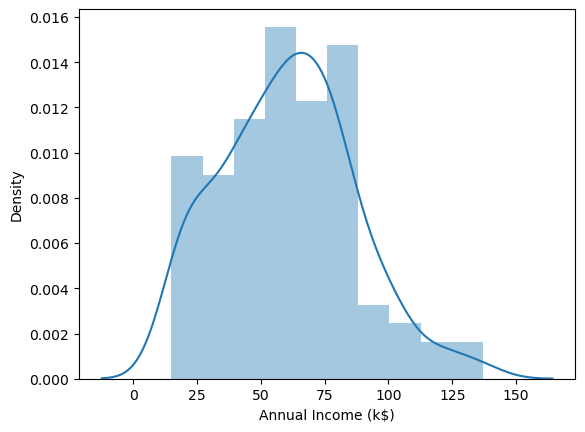

In [6]:
sns.distplot(df['Annual Income (k$)']);

# Distribution Plot

The distributions generally tend to the normal distribution, with Spending Score as the most normal distribution.
So it will become our metrics for deep analytics ahead.

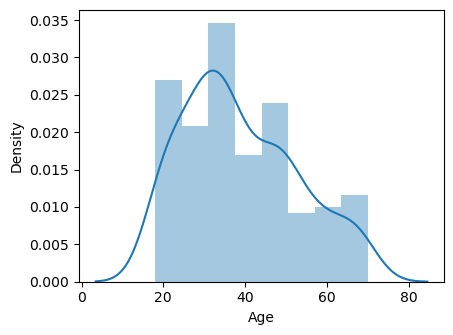

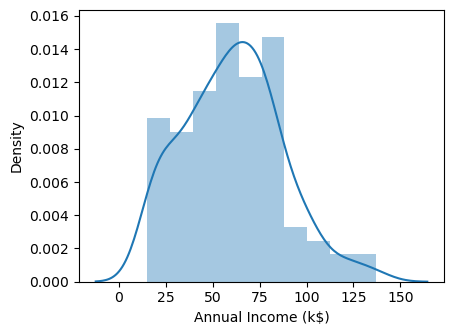

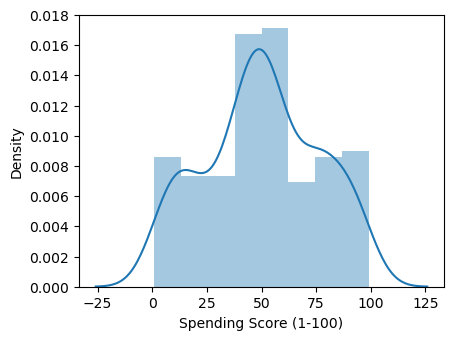

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i, col in enumerate(columns,1):
    plt.figure(figsize=(16,12))
    plt.subplot(3,3,i)
    sns.distplot(df[col])
   

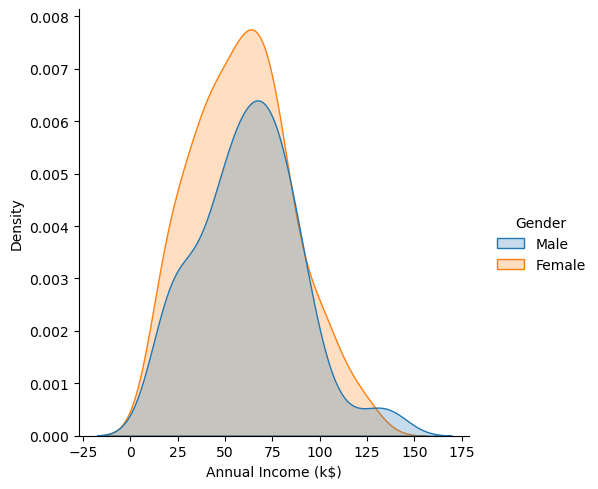

In [8]:
sns.displot(df, x='Annual Income (k$)', hue='Gender', kind='kde', fill=True)
plt.show()

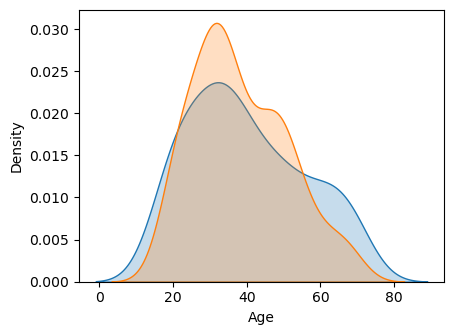

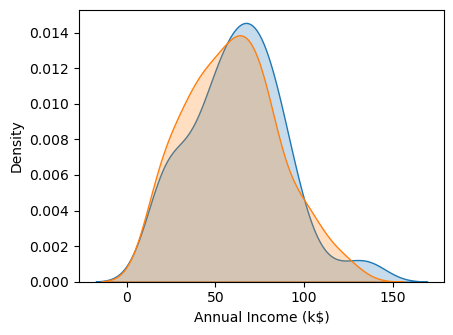

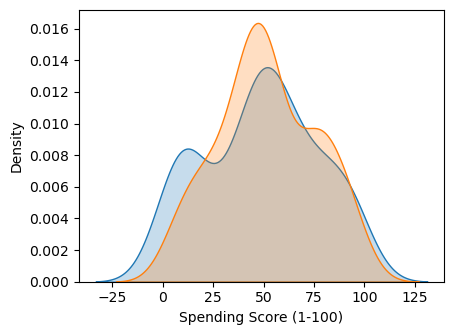

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, column in enumerate(columns, 1):
    plt.figure(figsize=(16, 12))
    plt.subplot(3, 3, i)
    for gender in df['Gender'].unique(): 
        sns.kdeplot(df[df['Gender'] == gender][column], shade=True, label=gender)
    
      


# Box Plot by Gender:

### Age Distribution Analysis:
There isn't a significant divergence observed; however, male customers tend to be older than female customers. Nonetheless, the majority of customers fall within the adult age range, typically around 35 to 40 years old.

### Income Variation:
Noteworthy are the outliers in income, particularly among male customers, suggesting a wider income range among males compared to females.

### Spending Score Analysis:
Females generally exhibit higher spending scores, indicating a tendency for women to frequent shopping malls more frequently than men, aligning with prevailing real-world trends.

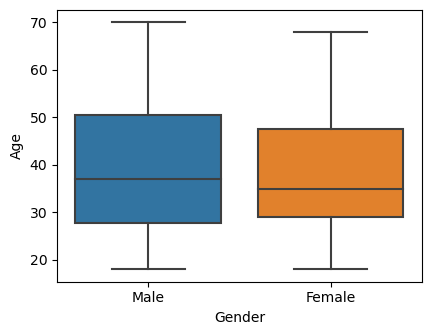

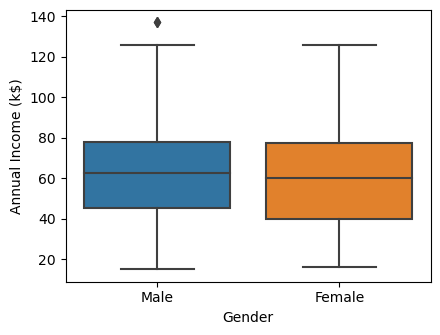

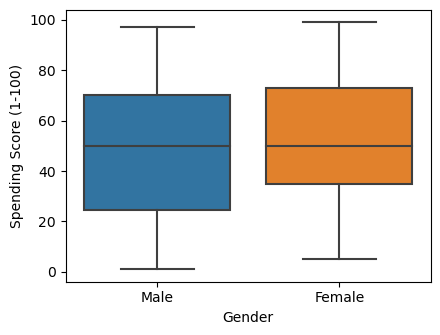

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i,col in enumerate(columns,1):
    plt.figure(figsize=(16,12))
    plt.subplot(3,3,i)
    sns.boxplot(data=df,x='Gender',y=df[col])
   


In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

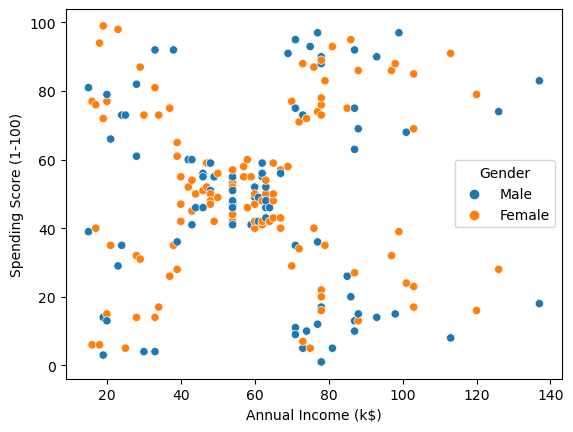

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)', hue=df.Gender );

### We can see there are several groups based on behaviour between Income and Score.

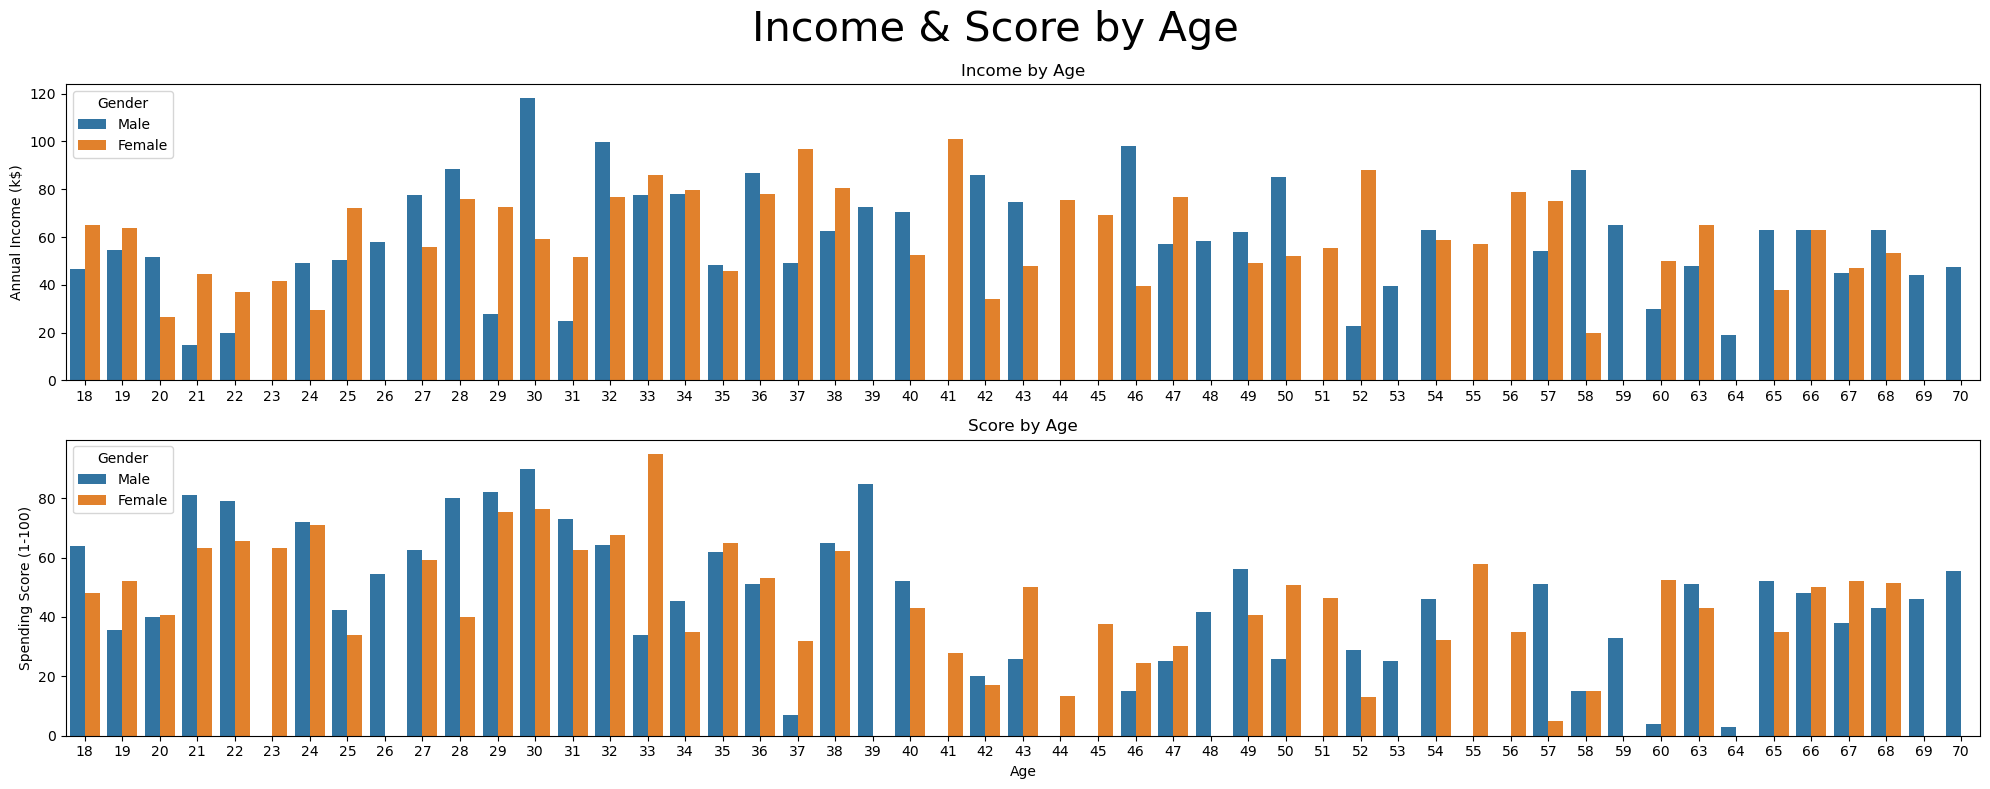

In [13]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
sns.barplot (data=df, x='Age', y='Annual Income (k$)', hue='Gender', ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2, 1, 2)
sns.barplot(data=df,x='Age', y='Spending Score (1-100)', hue='Gender',  ci=0)
plt.title('Score by Age')

plt.suptitle('Income & Score by Age', size=30)

plt.tight_layout()


#### This barplot provides valuable insights into the relationship between age and spending behavior. It reveals that the age group between 20 and 40 demonstrates a strong buying power, making them a prime target audience for increasing revenue and transactions.

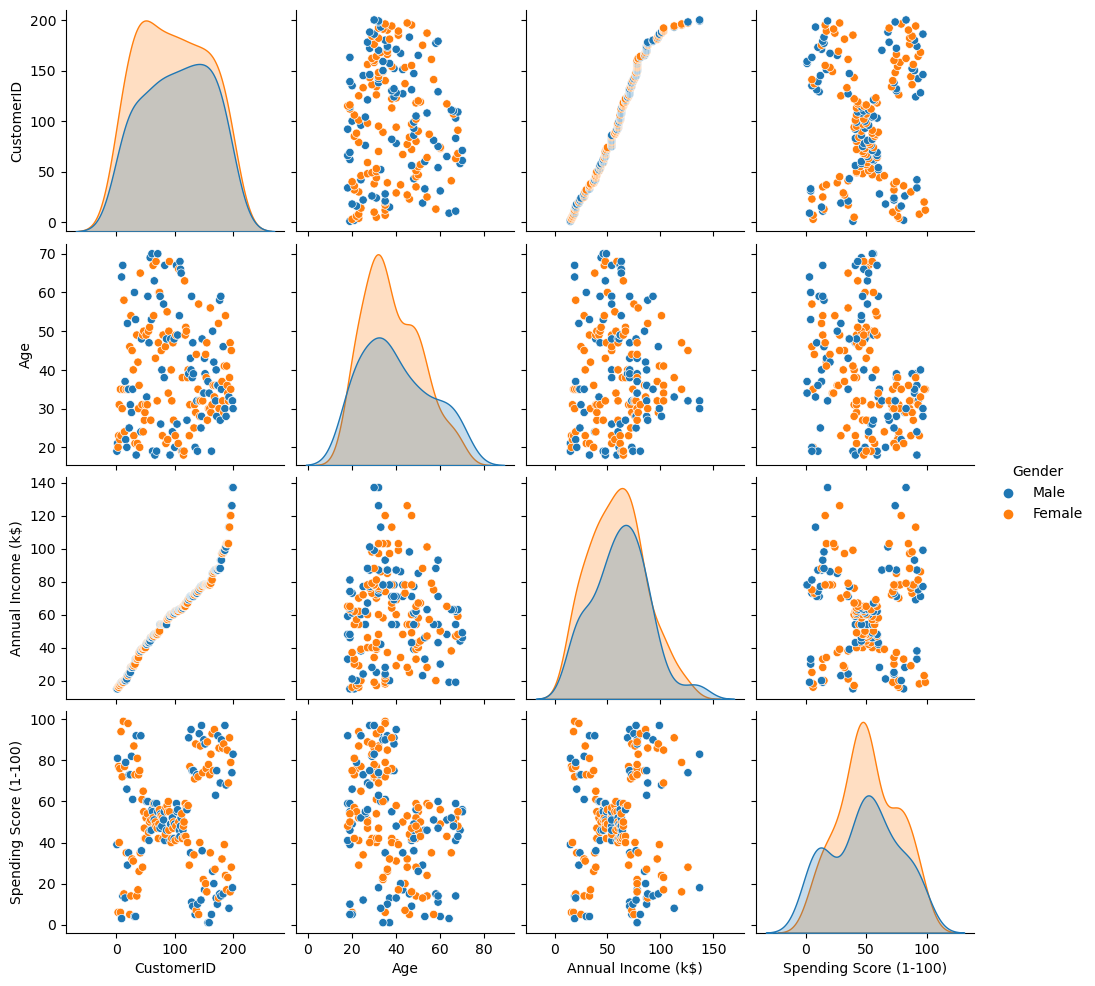

In [14]:
sns.pairplot(df,hue='Gender');

In [15]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Clustering - Univariate, Bivariate, Multivariate

Clustering involves grouping a set of objects so that items within the same cluster are more similar to each other than to those in other clusters.

K-Means, an unsupervised machine learning algorithm, partitions data into k clusters. The number of clusters is predetermined by the user, and the algorithm attempts to group the data, even if this number may not be optimal for the given dataset.

In our case, we'll utilize K-Means for clustering mall customers, enabling us to identify distinct groups and formulate marketing strategies tailored to each cluster.

### Univariate Clustering

In [16]:
clustering1 = KMeans(n_clusters=3)

In [17]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [20]:
clustering1.inertia_

23528.152173913048

In [21]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [22]:
intertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.330930930926,
 13278.112713472488,
 8546.148268106164,
 5050.9047619047615,
 3989.608946608946,
 2822.4996947496948,
 2208.812049062049,
 1767.6406204906207]

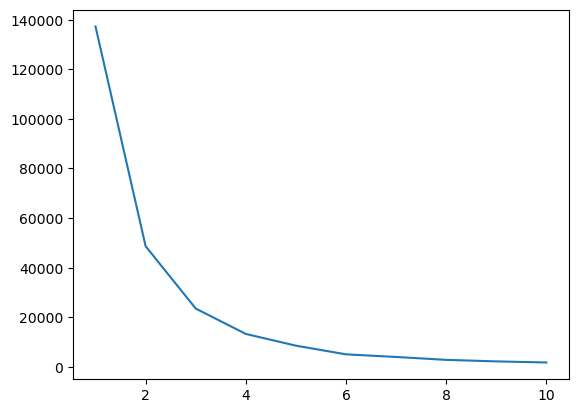

In [23]:
plt.plot(range(1,11),intertia_scores);

In [24]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


### Bivariate Clustering

In [25]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


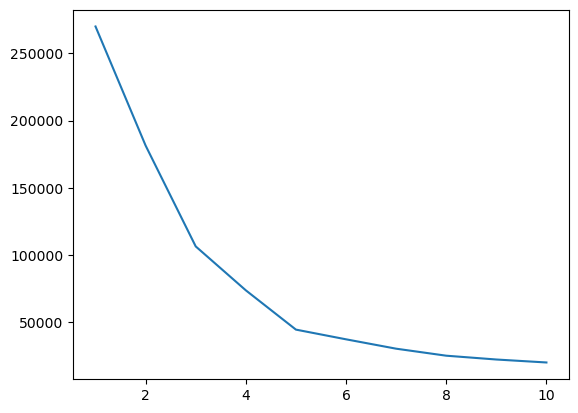

In [26]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [27]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

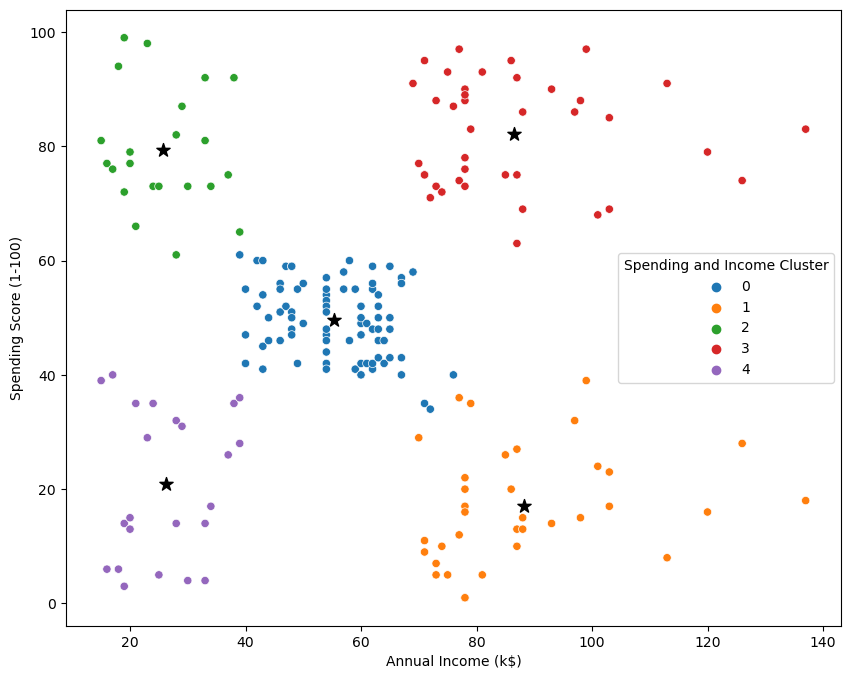

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [29]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


### Mulivariate clustering 

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [31]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,2,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,2,False
4,5,31,17,40,1,4,False


In [32]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [33]:
dff = scale.fit_transform(dff)

In [34]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(dff)

KMeans(n_clusters=5)

In [35]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 2, 2, 2, 0, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [36]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment'] = kmeans.labels_

In [37]:
df_segm_kmeans

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Segment
0,1,Male,19,15,39,1,4,0
1,2,Male,21,15,81,1,2,0
2,3,Female,20,16,6,1,4,1
3,4,Female,23,16,77,1,2,0
4,5,Female,31,17,40,1,4,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3,3
196,197,Female,45,126,28,2,1,4
197,198,Male,32,126,74,2,3,3
198,199,Male,32,137,18,2,1,4


In [38]:
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Segment']
df_segm_subset = df_segm_kmeans[selected_columns]
df_segm_subset

,Age,Annual Income (k$),Spending Score (1-100),Segment
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,4
197,32,126,74,3
198,32,137,18,4


In [39]:
df_segm_analysis = df_segm_subset.groupby(['Segment']).mean()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Segment,,,
0,25.185185,41.092593,62.240741
1,46.250000,26.750000,18.350000
2,55.638298,54.382979,48.851064
3,32.875000,86.100000,81.525000
4,39.871795,86.102564,19.358974


In [48]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'Spender Customer',
                1:'Low Target Customer',2:'Neutral Customer',
                3:'Loyal Customer',
                4: 'Approachable Customer'})

In [49]:
df_segm_kmeans

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Segment,Labels
0,1,Male,19,15,39,1,4,0,Spender Customer
1,2,Male,21,15,81,1,2,0,Spender Customer
2,3,Female,20,16,6,1,4,1,Low Target Customer
3,4,Female,23,16,77,1,2,0,Spender Customer
4,5,Female,31,17,40,1,4,0,Spender Customer
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3,3,Loyal Customer
196,197,Female,45,126,28,2,1,4,Approachable Customer
197,198,Male,32,126,74,2,3,3,Loyal Customer
198,199,Male,32,137,18,2,1,4,Approachable Customer


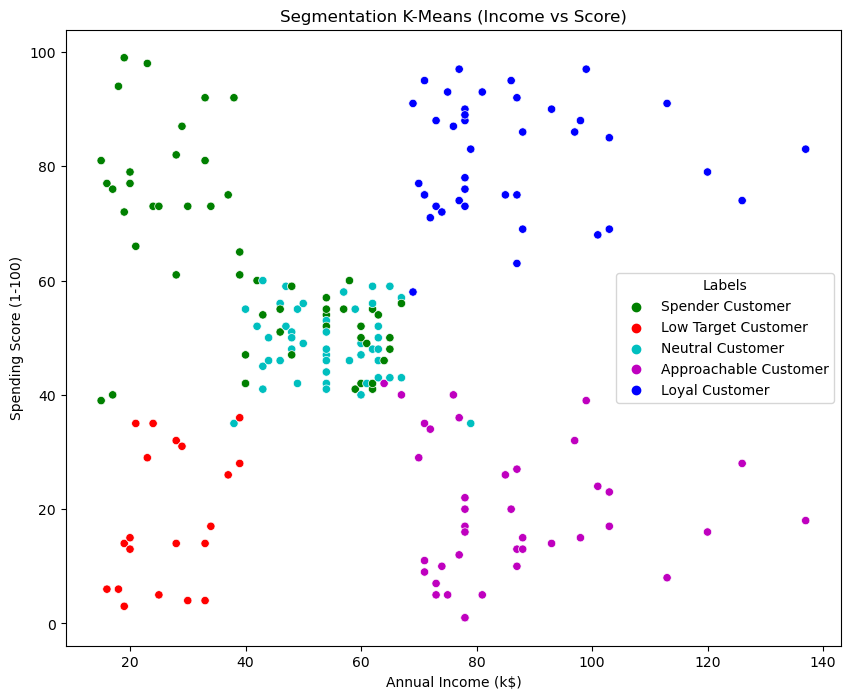

<Figure size 640x480 with 0 Axes>

In [58]:
x_axis = df_segm_kmeans['Annual Income (k$)']
y_axis = df_segm_kmeans['Spending Score (1-100)']
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_segm_kmeans, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', palette=['g', 'r', 'c', 'm', 'b'])
plt.title('Segmentation K-Means (Income vs Score)')
plt.show()
plt.savefig('clustering_Kmeans.png')


In [51]:
df_segm_kmeans

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Segment,Labels
0,1,Male,19,15,39,1,4,0,Spender Customer
1,2,Male,21,15,81,1,2,0,Spender Customer
2,3,Female,20,16,6,1,4,1,Low Target Customer
3,4,Female,23,16,77,1,2,0,Spender Customer
4,5,Female,31,17,40,1,4,0,Spender Customer
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3,3,Loyal Customer
196,197,Female,45,126,28,2,1,4,Approachable Customer
197,198,Male,32,126,74,2,3,3,Loyal Customer
198,199,Male,32,137,18,2,1,4,Approachable Customer


# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that works based on the density of objects. 

It identifies clusters by grouping points that are close to each other and separates regions of high density from regions of low density. 

The algorithm requires two parameters: Epsilon, which specifies the radius within which points are considered neighbors, and Minimum Points, which sets the minimum number of points required to form a cluster. 

This algorithm is useful for clustering data with arbitrary shapes and handling clusters within clusters.

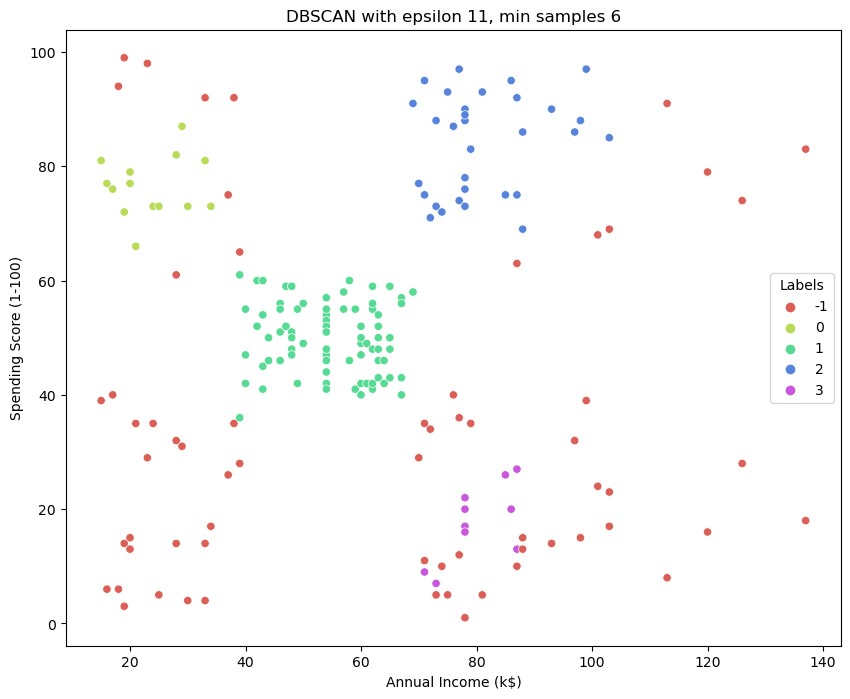

<Figure size 640x480 with 0 Axes>

In [53]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(df_backup)

df['Labels'] = db.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=df,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()
plt.savefig('clustering_DBSCAN.png')





### As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had larger dataset.

# Hierarchical Clustering

It creates a cluster hierarchy by iteratively merging the closest pairs of clusters, starting with each point as a separate cluster.

Algorithm Process involves iteratively merging clusters based on a chosen criterion like distance or similarity, resulting in a dendrogram showing the merging process.

Dendrogram Visualization visually represents the merging process, enabling the determination of the number of clusters by cutting the dendrogram at a suitable height.

Cluster Interpretation assigns data points to clusters without specifying the number beforehand, facilitating exploration but requiring careful consideration of parameters.

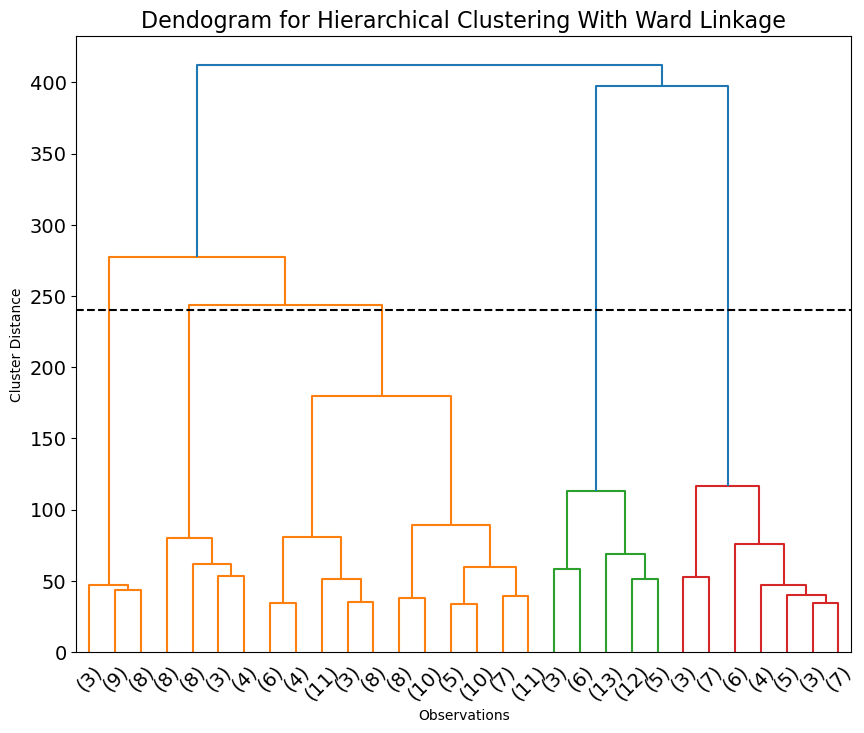

In [54]:
from scipy.cluster import hierarchy

plt.figure(figsize=(10, 8))
ax = plt.axes()

ax = hierarchy.dendrogram(hierarchy.linkage(df_backup, method='ward'), truncate_mode='lastp', show_leaf_counts=True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize=16)
plt.axhline(y=240, color='black', linestyle='--') 
plt.xlabel('Observations', fontsize=10)
plt.ylabel('Cluster Distance', fontsize=10)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()



The dendrogram shows hierarchical clustering using Ward Linkage. A horizontal line (black) determines the total clusters by counting intersecting vertical lines.
### With 5 intersecting lines, the optimal clusters are 5.

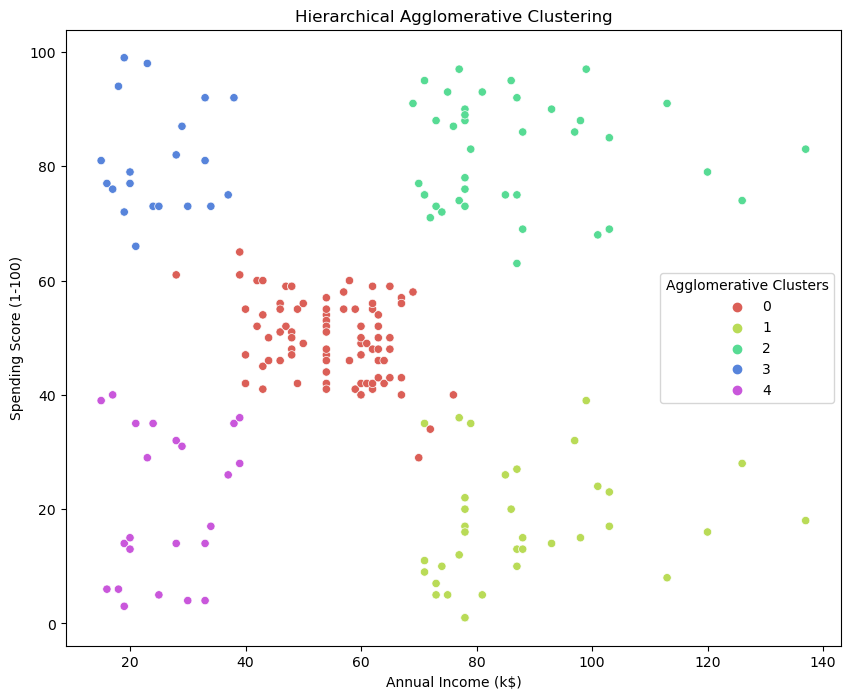

In [59]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit_predict(df_backup)
df['Agglomerative Clusters'] = ac

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglomerative Clusters', data=df,
                palette=sns.color_palette('hls', np.unique(ac).shape[0]))
plt.title('Hierarchical Agglomerative Clustering');
plt.savefig('clustering_Hierarchical Agglomerative Clustering.png')


# Comparative Analysis

The above comparison underscores the inadequacy of DBSCAN in forming meaningful clusters, primarily because it relies on the density of points. When a cluster exhibits lower density relative to others, DBSCAN may overlook it, leading to subpar results.

In turn, K-Means and Hierarchical Clustering algorithm successfully formed meaningful clusters, facilitating insightful customer segmentation analysis. These results enable us to devise strategies aimed at enhancing our business sales.


# Summary and Recommendations

After employing above clustering algorithms to analyze customer data, we've identified distinct segments with unique characteristics, allowing for tailored strategies:

 ###  Approachable Customers: 
 Characterized by substantial income but low spending, present an opportunity for targeted intervention. Implementing a membership program could effectively stimulate spending behavior within this segment.

  ### Spender Customers: 
 To engage Spender Customers effectively, targeted discount promotions on products aligned with their preferences could be impactful. However, further analysis with additional purchasing data is required to personalize the approach for this segment.
 
  ###  High Target & Neutral Customers:
 Our primary focus should be on High Target Customer and Neutral Customer segments to foster loyalty and encourage consistent visits to our mall.

###    Low Target Customers (Low Priority):
   It's advisable to allocate fewer resources towards engaging Low Target Customers (Low Priority) due to their limited income and spending scores.

In [55]:
df.to_csv('Clustering.csv')